<a href="https://colab.research.google.com/github/sadidoll/Artifical-Interlligence/blob/master/Hw3/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 3**

###**Problem 1:**
Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:
 
* Choose class label c=0 with probability 1/2 and c=1 with probability 1/2.
* Choose the first feature x_1 uniformly at random in the interval [0, 1).
* Set the second feature x_2 to be x_2 = w * x_1 + b + (-1)^c * n, where the "noise" n is chosen according to the normal distribution with mean mu and standard deviation sigma.
* The ith row of the array data consists of the features x_1 and x_2.
* The ith entry of the vector labels is the class label c.

Implement the function display_random_data that takes as input the above two arrays labels and data. It should create scatter plot of the 2D points stored in data. Use red dots to plot the points whose labels are 1 and blue dots to plot the points whose labels are 0.

Hints: You should see that the 2D points (feature vectors) corresponding to different classes are approximately separated by the line y = w * x + b, where w and b are the parameters that you used to generate the data. Note that the smaller the parameter mu, the closer the points are to this line. Also, the larger the parameter sigma, the more points can be on the wrong side of this line.

Experiment with different values of mu and sigma. Make sure that the parameter m is large enough so you have enough data points.

Split the data/labels into a training set (80%) and a test set (20%).

In [0]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
#import sklearn.model_selection import train_test_split

In [0]:
def get_random_data(w, b, mu, sigma, m):
 
  # Generating first feature x_1 uniformly at random 
  x_1 = np.random.uniform(0, 1, size=(m,1))
  # Generating the label array with zeros and ones
  labels = np.random.choice([0,1], size=(m,1))
  # n is chosen according to the normal distribution with mean mu and standard deviation sigma
  # Genreating random data 
  n = np.random.normal(mu, sigma, size=(m,1))

  # Setting the second feature x_2
  x_2 = w * x_1 + b + (-1)** labels * n

  # Concatenating x_1 and x_2 fatures
  data = np.concatenate((x_1,x_2), axis = 1)

  return data,labels

    

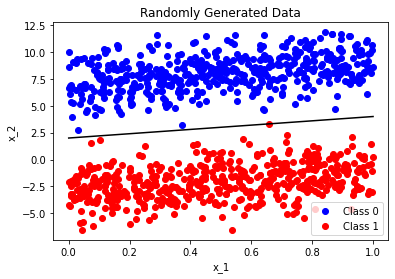

In [252]:
train_size = m * 0.8

data = np.array(data)
labels = np.array(labels)

def display_random_data(labels, data):
  plt.figure()
  j = labels.flatten()
  #for x in range(0,m):
  #if label is 0 then blue points if 1 be red points
  data_0 = data[j == 0,:]
  plt.scatter(data_0[:,0],data_0 [:,1], c = 'blue', label = 'Class 0')
  data_1 = data[j == 1,:]
  plt.scatter(data_1[:,0],data_1 [:,1], c = 'red', label = 'Class 1')

  x = np.linspace(0,1)
  y = w * x + b
  #plot the true line
  plt.plot(x,y,'black')
  plt.title('Randomly Generated Data')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()

# Function to split the data
def split_data(data, labels):
  # Spliting the data with a 80:20 ratio
  test_data = data[(int)(train_size):]
  train_data = data[:(int)(train_size)]
  train_labels = labels[:(int)(train_size)]
  test_labels = labels[(int)(train_size):]

  return train_data, test_data, train_labels, test_labels

#display the data
mu = 5
sigma = 1.5
m = 1000
w = 2
b = 2

data, labels = get_random_data(w,b,mu,sigma,m)
display_random_data(labels,data)
train_data, test_data, train_labels, test_labels = split_data(data, labels)

###**Problem 2:**
Create a Keras to implement logistic regression with two features and train it with the data generated in Problem 1. The loss should be the binary cross entropy loss.

How well does the trained model separate the red and blue dots? You can obtain the separating line determined by the model by extracting the weights from the dense layer using the function get_weights. See https://keras.io/layers/about-keras-layers/.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model. Make sure that you describe in detail in your notebook how you proceed to obtain the separating line.

Note that you have to carry out some simple steps to obtain the separating line from the model weights (the two weights and the bias term of the dense layer). This is not immediately obvious. It maybe helpful to take a look at the heatmap below.

The trained model realizes function f : R^2 -> R that takes two features as input and outputs a number in the interval [0, 1]. Use a heatmap to visualize this function.

In [0]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import initializers
from tensorflow.python.keras import Sequential
from tensorflow.python.keras import optimizers

In [254]:
# Defining the model
keras_model = Sequential()
# Adding a dense layer to the model
keras_model.add(Dense(1,input_shape = (2,), activation = 'sigmoid', bias_initializer=initializers.Constant(1),))
# Compliing the network
keras_model.compile(optimizer='rmsprop', loss ='binary_crossentropy', metrics = ['accuracy'])

#w = keras_model.layers[0].get_weights()[0]
#b = keras_model.layers[0].get_weights()[1]
#print(w)
#print(b)
# Compiling and training the model on the data
#epochs = 100
#batch_size = 512
keras_model.summary()
history = keras_model.fit(train_data,train_labels,epochs = 100, batch_size = 512,
                          validation_data = (test_data,test_labels))



Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 56ms/step - loss: 1.0604 - accuracy: 0.5038 - val_loss: 0.9847 - val_accuracy: 0.5400
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 1.0323 - accuracy: 0.5038 - val_loss: 0.9717 - val_accuracy: 0.5400
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 1.0256 - accuracy: 0.5038 - val_loss: 0.9607 - val_accuracy: 0.5400
Epoch 4/100
2/2 [==============================] - 0s 19ms/step - loss: 1.0086 - accuracy: 0.5038 - val_loss: 0.9510 - val_accuracy: 0.5400
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 1.0013 - accuracy: 0.

Function that will display the data with prediction and actual separating line

In [0]:
def prediction_display(data, labels, pred_w, pred_b, w, b):
  shape = labels.flatten()
  data_0 = data[shape == 0,:]
  plt.scatter(data_0[:,0],data_0 [:,1], c = 'blue', label = 'Class 0')
  data_1 = data[shape == 1,:]
  plt.scatter(data_1[:,0],data_1 [:,1], c = 'red', label = 'Class 1')

# To display the prediction line
  x = np.linspace(0, 1, 100)
  pred_y = pred_w * x + pred_b
  # To display Actual line
  y = w * x + b
  plt.plot(x, pred_y, c = 'green', label = 'Prediction Line')
  plt.plot(x, y, c = 'black', label = 'Actual Line')

  plt.title('Predection and actual line on random data')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()
  return


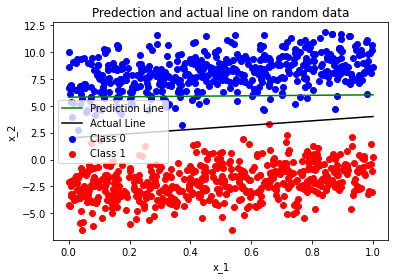

In [256]:
# Getting weight from the model
weights = keras_model.get_weights()

w_1 = weights[0][0]
w_2 = weights[0][1]
bias  = weights[1][0]

# The prediction weight and bias term in order to seperate line
pred_w = -w_1 / w_2
pred_b = -bias / w_2

prediction_display(data,labels, pred_w, pred_b,w , b)

Function to display the heatmap made from the prediction from the model

In [0]:
def prediction_heatmap(data):
  x_heatmap = np.linspace(0,1,100)
  y_max = max(data[:,1])
  y_min = min(data[:,1])
  y_heatmap = np.linspace(y_min, y_max, 100)
  X, Y = np.meshgrid(x_heatmap, y_heatmap)
  # creates Z values based on x,y grid
  flat_x = X.flatten()
  flat_y = Y.flatten() 
  Z = np.column_stack((flat_x, flat_y))

  Z = keras_model.predict(Z)
  Z = Z.reshape((100,100))
  fig = plt.figure()
  ax = plt.axes()
  contours = ax.contourf(X, Y, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')

  plt.colorbar(im, ax= ax)

  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  ax.set_title("Heatmap Based on Network Predictions")
  plt.show()
  return

  
  

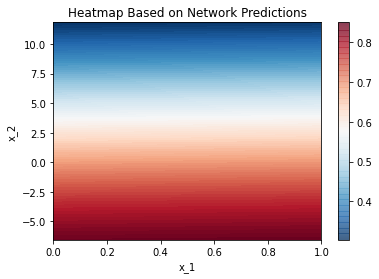

In [262]:
prediction_heatmap(data)

###**Problem 3:**
Use numpy to implement a logistic regression model from scratch and train it with the data generated as in Problem 1.

Hints: Look at the notes on logistic regression to figure out what the gradient is of the binary cross entropy loss with respect to w and b. Note that you only have to implement stochastic gradient, that is, you do not have to write vectorized code for mini-batch gradient descent.

Create a plot showing the random data, the true line used to generate the data, and the separating line of the trained model.

Use a heatmap to visualize the function defined by your trained model.

You also have to compute the binary cross entropy loss and accuracy on the test set

In [0]:
# Function for sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
# Function to predict
def prediction(a):
  if a > 0.5:
    return 1 
  else:
    return 0
# Function to calculate binary cross entropy loss
def binary_crossentropy_loss(a, label):
  return (-label * np.log(a)) - ((1 - label) * np.log(1 - a))

def model_testing(test_data, test_labels, W_b):
  loss = 0
  accurate_predictions = 0
  testd = np.column_stack((test_data, np.ones(shape=(test_data.shape[0], 1))))
  for i_data in range(len(test_data)):
        # Process the input
        z = np.dot(testd[i_data], W_b)
        a = sigmoid(z)

        # Make a prediction
        p = prediction(a)
        if p == test_labels[i_data]:
            accurate_predictions += 1
            # Determine loss
        loss += binary_crossentropy_loss(a, test_labels[i_data])
  print(loss)
  return (loss / len(test_data), accurate_predictions / len(test_data))
def logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learing_rate):
    # Randomize the initial weights
    W_b = np.random.random_sample((3, ))
    #combine data with biases
    trd = np.column_stack((train_data, np.ones(shape=(train_data.shape[0], 1))))
    for epoch in range(epochs):
        # Only perform stochastic gradient descent
        for i_data in range(len(train_data)):
            # Process the input
            z = np.dot(trd[i_data], W_b)
            a = sigmoid(z)

            # Determine the gradient of the loss
            Lg_b = (a - train_labels[i_data])* trd[i_data]

            # Apply the gradient to the weights
            W_b -= Lg_b * learning_rate
        
        # Analyze the loss and accuracy for each epoch
        loss, accuracy = model_testing(test_data, test_labels, W_b)
        print(f'Epoch {epoch+1}/{epochs} - val_loss: {loss} - val_accuracy: {accuracy}')
    
    # Return the trained weights
    return W_b

In [283]:
epochs = 10
learning_rate = 0.01

W_b = logistic_regression(train_data, train_labels, test_data, test_labels, epochs, learning_rate)

[11.70866096]
Epoch 1/10 - val_loss: [0.0585433] - val_accuracy: 0.995
[8.41164614]
Epoch 2/10 - val_loss: [0.04205823] - val_accuracy: 0.995
[6.65726242]
Epoch 3/10 - val_loss: [0.03328631] - val_accuracy: 0.995
[5.54351546]
Epoch 4/10 - val_loss: [0.02771758] - val_accuracy: 0.995
[4.77134328]
Epoch 5/10 - val_loss: [0.02385672] - val_accuracy: 0.995
[4.20391697]
Epoch 6/10 - val_loss: [0.02101958] - val_accuracy: 0.995
[3.76882193]
Epoch 7/10 - val_loss: [0.01884411] - val_accuracy: 1.0
[3.42414113]
Epoch 8/10 - val_loss: [0.01712071] - val_accuracy: 1.0
[3.14397243]
Epoch 9/10 - val_loss: [0.01571986] - val_accuracy: 1.0
[2.91146416]
Epoch 10/10 - val_loss: [0.01455732] - val_accuracy: 1.0


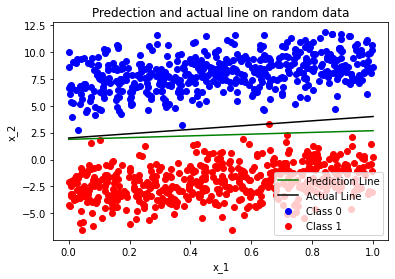

In [287]:
#same code from the displaying data from above expcept using 
def prediction_display(data, labels, pred_w, pred_b, w, b):
  shape = labels.flatten()
  data_0 = data[shape == 0,:]
  plt.scatter(data_0[:,0],data_0 [:,1], c = 'blue', label = 'Class 0')
  data_1 = data[shape == 1,:]
  plt.scatter(data_1[:,0],data_1 [:,1], c = 'red', label = 'Class 1')

# To display the prediction line
  x = np.linspace(0, 1, 100)
  w_1 = W_b[0]
  w_2 = W_b[1]
  bias = W_b[2]
  pred_w = -w_1 / w_2
  pred_b = -bias / w_2

  pred_y = pred_w * x + pred_b
  # To display Actual line
  y = w * x + b
  plt.plot(x, pred_y, c = 'green', label = 'Prediction Line')
  plt.plot(x, y, c = 'black', label = 'Actual Line')

  plt.title('Predection and actual line on random data')
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.legend()
  plt.show()
  return
prediction_display(data,labels, pred_w, pred_b,w , b)

In [0]:
def pred(data):
  data_n = np.column_stack((data, np.ones(shape=(data.shape[0], 1))))
  z = np.dot(data_n,W_b)
  return sigmoid(z)
def prediction_heatmap(data):
  x_heatmap = np.linspace(0,1,100)
  y_max = max(data[:,1])
  y_min = min(data[:,1])
  y_heatmap = np.linspace(y_min, y_max, 100)
  X, Y = np.meshgrid(x_heatmap, y_heatmap)
  # creates Z values based on x,y grid
  flat_x = X.flatten()
  flat_y = Y.flatten() 
  Z = np.column_stack((flat_x, flat_y))

  Z = pred(Z)
  Z = Z.reshape((100,100))
  fig = plt.figure()
  ax = plt.axes()
  contours = ax.contourf(X, Y, Z, 100, cmap='RdBu_r')
  im = ax.imshow(Z, extent=[0, 1, y_min, y_max], cmap='RdBu_r', alpha=0.5, aspect='auto')

  plt.colorbar(im, ax= ax)

  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  ax.set_title("Heatmap Based on Network Predictions")
  plt.show()
  return

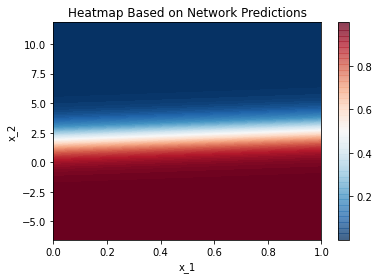

In [298]:
  prediction_heatmap(data)